In [79]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split     #sklearn library write the hypothesis function for us
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
%cd /content/drive/My Drive/Colab Notebooks/Weather_Prediction

/content/drive/My Drive/Colab Notebooks/Weather_Prediction


In [87]:
df=pd.read_csv("indian_summer.csv",usecols = ['humidity','temp','conditions']) #Load the dataset from csv file
#print(df)


df = df.replace(['Clear'],0)
df = df.replace(['Rain'],1)
df = df.replace(['Partially cloudy'],2)

df = df.replace(['Rain, Partially cloudy'],3)

df = df.replace(['Overcast'],4)
df = df.replace(['Rain, Overcast'],5)
#df_x = df.iloc[:1000,:]

df1 = df.drop(['conditions'], axis=1)
df1 = df1.iloc[:12000,:]
x=np.array(df1)
print(x)


df2 = df.drop(['humidity','temp'],axis = 1)
df2 = df2.iloc[:12000,:]
y = np.array(df2)
#y = df.conditions.values
'''
for i in range(0,len(y)-1):
  if y[i] == 'Clear':
    y[i] = 0
  elif y[i] == 'Rain':
    y[i] = 1
  
  elif y[i] == 'Partially cloudy':
    y[i] = 2
  elif y[i] == 'Rain, Partially cloudy':
    y[i] = 3
  else:
    y[i] = 4
'''
#np.delete(y,'Partially cloudy')
print(y)


[[27.1  22.6 ]
 [25.8  27.62]
 [26.   23.18]
 ...
 [25.2  92.83]
 [25.   92.96]
 [26.   85.62]]
[[0.]
 [0.]
 [0.]
 ...
 [4.]
 [4.]
 [4.]]


In [88]:
#X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size = 0.8,random_state=3)
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
model.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [104]:
#print(x[:,0])
print("Enter the Temperature Value : ")
x_1 = input()
print("Enter the Humidity Value : ")
x_2 = input()
x1 = [[x_1 ,x_2]]

y1 = model.predict(x1)
#print(y1)
if 0<= y1 and y1<1:
   print("Clear")
elif 0.8<y1 and y1<1.8 :
   print("Rain")
 
elif 1.8< y1 and y1<2:
  print("Rain,Partially Cloudy")

elif 2<y1 and y1<3:
   print("Rain, Partially cloudy")

Enter the Temperature Value : 
31
Enter the Humidity Value : 
89
Rain, Partially cloudy


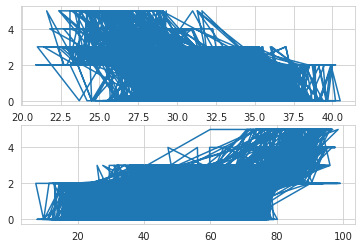

In [108]:
fig, ax = plt.subplots(2)
 
# Accessing each axes object to plot the data through returned array
ax[0].plot(x[:,0], y)
ax[1].plot(x[:,1], y)